## Stock Market Analysis of Apparel companies

In this notebook I will analyse the stocks of American Eagle Outfitters (AEO), GAP Inc (GPS), a group that owns several brands including my favourite Tommy Hilfigher (PVH) and Burbury (BRBY).

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas.io.data import DataReader

from datetime import datetime

In [2]:
# Apparel companies that I will use for this analysis
company_list = ['AEO', 'GPS', 'PVH']

In [3]:
# function to load stocks for a certain period of time

def load_stocks(list_of_stocks, years):
    
    # define time interval
    end_time = datetime.now()
    start_time = datetime(end_time.year - years, end_time.month, end_time.day)
    
    # load stocks
    for stock in list_of_stocks:
        globals()[stock] = DataReader(stock, 'yahoo', start_time, end_time)

In [4]:
# load 1 year of stocks data
load_stocks(company_list, 1)

In [5]:
AEO.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-02,14.95,15.060000,14.77,14.93,2996100,14.479422
2015-03-03,14.74,14.910000,14.67,14.82,7145900,14.372741
2015-03-04,16.18,16.360001,15.64,15.96,20198500,15.478337


In [6]:
GPS.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-02,41.279999,41.560001,40.970001,41.410000,5359200,40.22585
2015-03-03,42.209999,42.299999,41.700001,41.980000,5644600,40.77955
2015-03-04,42.150002,42.250000,41.689999,42.029999,3192400,40.82812


In [7]:
PVH.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-02,106.070000,108.199997,106.010002,106.739998,1359900,106.564783
2015-03-03,104.500000,106.239998,104.250000,105.830002,2060100,105.656281
2015-03-04,105.639999,106.480003,105.139999,105.760002,1040700,105.586396


In [8]:
# load Burbury's stocks
end_time = datetime.now()
start_time = datetime(end_time.year - 1, end_time.month, end_time.day)
BRBY = DataReader('BRBY.L', 'yahoo', start_time, end_time)
BRBY.head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-02,1867,1899,1867,1892,911800,1845.995
2015-03-03,1899,1904,1843,1847,1017300,1802.089
2015-03-04,1846,1868,1817,1865,940300,1819.652


## Plot Adjusted Close Price

The closing price of a stock is the price of that stock at the close of the trading day. The **adjusted closing price** in addition takes into account corporate transactions factors such as dividends, stock splits and new stock offerings, and therefore represents a more accurate reflection of the stock's value. The adjusted closing price is useful to analyse historical returns.

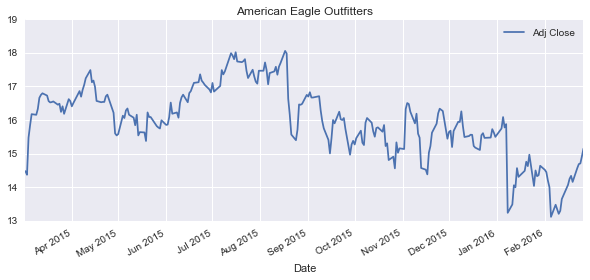

In [9]:
AEO['Adj Close'].plot(legend = True, figsize = (10,4), title = 'American Eagle Outfitters')

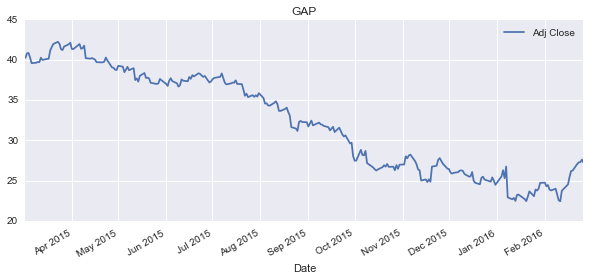

In [10]:
GPS['Adj Close'].plot(legend = True, figsize = (10,4), title = 'GAP')

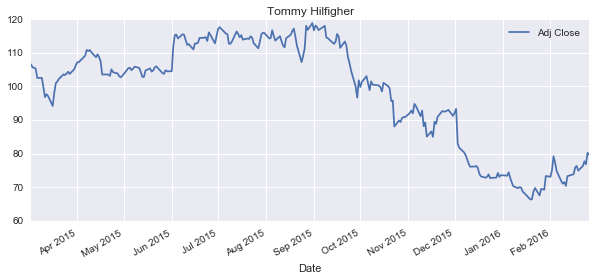

In [11]:
PVH['Adj Close'].plot(legend = True, figsize = (10,4), title = 'Tommy Hilfigher')

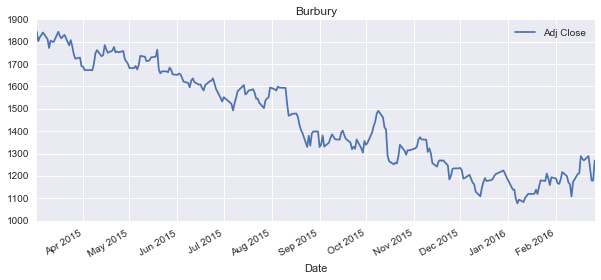

In [12]:
BRBY['Adj Close'].plot(legend = True, figsize = (10,4), title = 'Burbury')

A first look of the stock value for all the companies shows that the stocks lost value towards the end of 2015 - beginning of 2016!

## Volume

Volume is the number of shares traded over a certain period of time. It is the amount of shares that trade hands from sellers to buyers as a measure of activity. If a buyer of a stock purchases 100 shares from a seller, the volume for that period increases by 100 shares on the day of the transaction.

Taken from Investopedia http://www.investopedia.com

**Below the plots for daily volume for each stock**

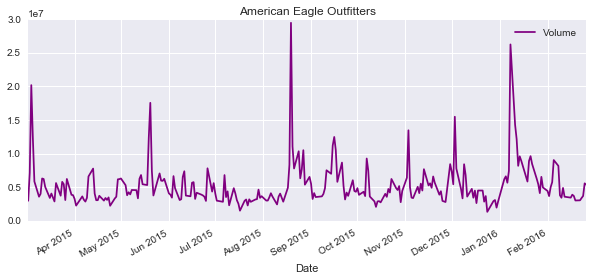

In [13]:
AEO['Volume'].plot(legend=True, color = 'purple', figsize = (10,4), title = 'American Eagle Outfitters')

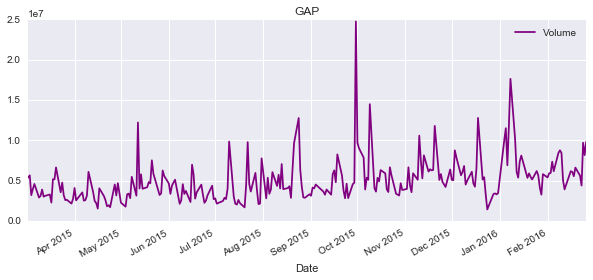

In [14]:
GPS['Volume'].plot(legend=True, color = 'purple', figsize = (10,4), title = 'GAP')

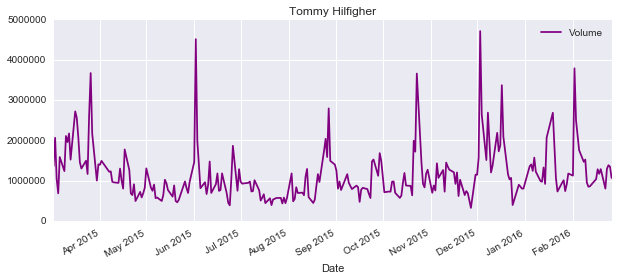

In [15]:
PVH['Volume'].plot(legend=True, color = 'purple', figsize = (10,4), title = 'Tommy Hilfigher')

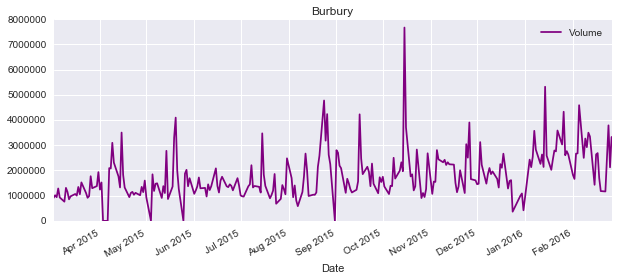

In [16]:
BRBY['Volume'].plot(legend=True, color = 'purple', figsize = (10,4), title = 'Burbury')

We observe that the higher volume belongs to Burbury, followed by PVH group, then American Eagle Outfitters and last GAP.

## Moving Average - MA

The moving average is a widely used indicator that smoothes out price action by filtering out the “noise” from random price fluctuations. MA is a trend-following indicator because it is based on past prices. The two basic and commonly used MAs are the simple moving average (SMA), which is the simple average of a security over a defined number of time periods, and the exponential moving average (EMA), which gives bigger weight to more recent prices. The most common applications of MAs are to identify the trend direction and to determine support and resistance levels.

###  Simple Moving Average - SMA

A simple moving average (SMA) is a simple, or arithmetic, moving average that is calculated by adding the closing price of the security for a number of time periods and then dividing this total by the number of time periods. Short-term averages respond quickly to changes in the price of the underlying, while long-term averages are slow to react.

In other words, this is the average stock price over a certain period of time. Many traders watch for short-term averages to cross above longer-term averages to signal the beginning of an uptrend.

Taken from Investopedia http://www.investopedia.com

In [17]:
# SMA calculation for 15 vs 50 days period
ma_day = [15, 50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AEO[column_name] = pd.rolling_mean(AEO['Adj Close'], ma)
    GPS[column_name] = pd.rolling_mean(GPS['Adj Close'], ma)
    PVH[column_name] = pd.rolling_mean(PVH['Adj Close'], ma)
    BRBY[column_name] = pd.rolling_mean(BRBY['Adj Close'], ma)

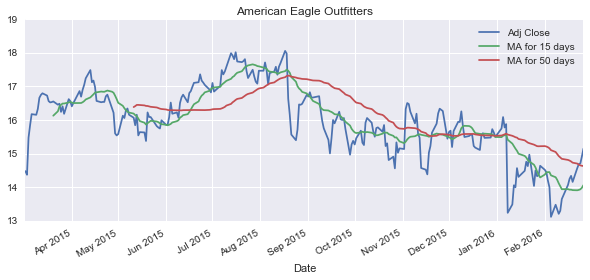

In [18]:
AEO[['Adj Close','MA for 15 days','MA for 50 days']].plot(subplots=False,
                                                          figsize=(10,4),
                                                         title = 'American Eagle Outfitters')

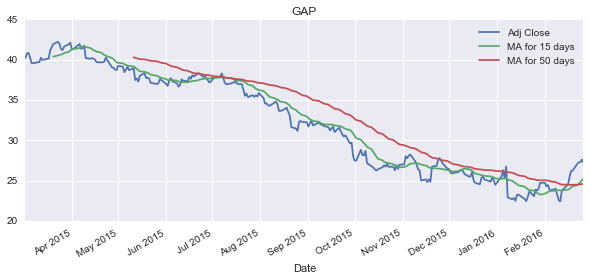

In [19]:
GPS[['Adj Close','MA for 15 days','MA for 50 days']].plot(subplots=False,
                                                          figsize=(10,4),
                                                         title = 'GAP')

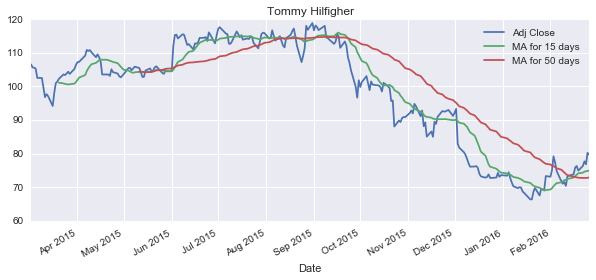

In [20]:
PVH[['Adj Close','MA for 15 days','MA for 50 days']].plot(subplots=False,
                                                          figsize=(10,4),
                                                         title = 'Tommy Hilfigher')

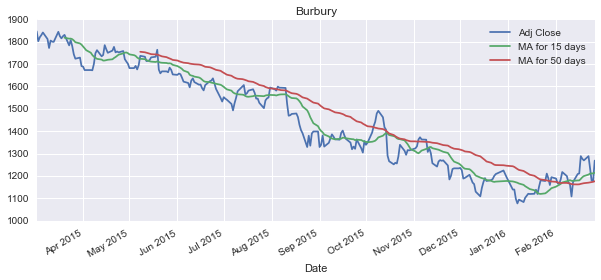

In [21]:
BRBY[['Adj Close','MA for 15 days','MA for 50 days']].plot(subplots=False,
                                                          figsize=(10,4),
                                                         title = 'Burbury')

We observe that for AEO and PVH (Tommy Hilfigher) the 15 day MA trend crosses over the 50 day MA in a downward direction in the months of September 2015 and October 2015, respectively. This is interpreted as a signal of the beginning of a down-trend for the stocks of those companies.

Similarly, at the end of February 2016, we observe for Burbury and PVH that the 15 day MA crosses the 50 day MA in an upward direction, signalling the beginning of an up-trend in the stock price for those companies.


###  Exponential Moving Average - EMA

An exponential moving average (EMA) is a type of moving average that is similar to a simple moving average, except that more weight is given to the latest data. 
This type of moving average reacts faster to recent price changes than a simple moving average. The 12- and 26-day EMAs are the most popular short-term averages, and they are used to create indicators like the moving average convergence divergence (MACD).

Taken from Investopedia http://www.investopedia.com

In [22]:
# EMA calculation for 12 vs 26 days period
ema_day = [12, 26]

for ema in ema_day:
    column_name = 'EMA for %s days' %(str(ema))
    AEO[column_name] = pd.ewma(AEO['Adj Close'], ema)
    GPS[column_name] = pd.ewma(GPS['Adj Close'], ema)
    PVH[column_name] = pd.ewma(PVH['Adj Close'], ema)
    BRBY[column_name] = pd.ewma(BRBY['Adj Close'], ema)

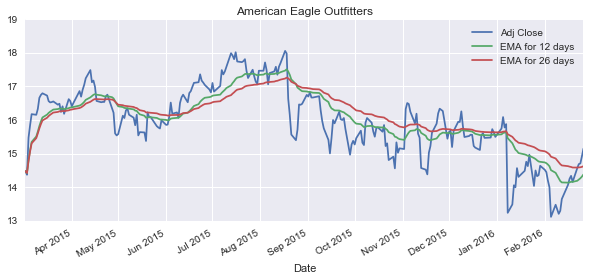

In [23]:
AEO[['Adj Close','EMA for 12 days','EMA for 26 days']].plot(subplots=False,
                                                          figsize=(10,4),
                                                         title = 'American Eagle Outfitters')

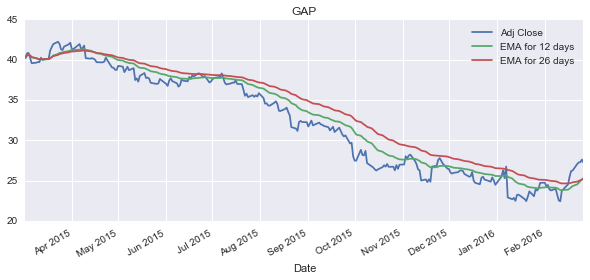

In [24]:
GPS[['Adj Close','EMA for 12 days','EMA for 26 days']].plot(subplots=False,
                                                          figsize=(10,4),
                                                         title = 'GAP')

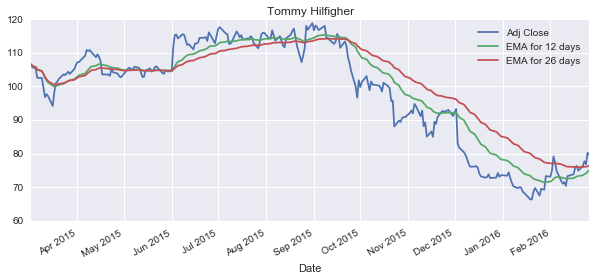

In [25]:
PVH[['Adj Close','EMA for 12 days','EMA for 26 days']].plot(subplots=False,
                                                          figsize=(10,4),
                                                         title = 'Tommy Hilfigher')

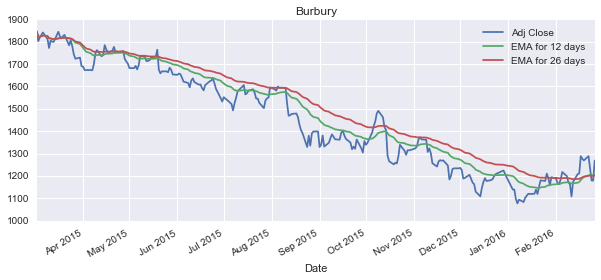

In [26]:
BRBY[['Adj Close','EMA for 12 days','EMA for 26 days']].plot(subplots=False,
                                                          figsize=(10,4),
                                                         title = 'Burbury')

## Moving Average Convergence Divergence - MACD

Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of prices. The MACD is calculated by subtracting the 26-day exponential moving average (EMA) from the 12-day EMA. Then, a nine-day EMA of the MACD, called the "signal line", is plotted on top of the MACD, functioning as a trigger for buy and sell signals.

Taken from Investopedia http://www.investopedia.com

In [27]:
# function to calculate the MACD
def MACD(stock):
    ema26, ema12 = stock
    return ema12 - ema26

In [28]:
AEO['MACD'] = AEO[['EMA for 26 days','EMA for 12 days']].apply(MACD, axis = 1)
GPS['MACD'] = GPS[['EMA for 26 days','EMA for 12 days']].apply(MACD, axis = 1)
PVH['MACD'] = PVH[['EMA for 26 days','EMA for 12 days']].apply(MACD, axis = 1)
BRBY['MACD'] = BRBY[['EMA for 26 days','EMA for 12 days']].apply(MACD, axis = 1)

In [29]:
AEO.head(3)

,Open,High,Low,Close,Volume,Adj Close,MA for 15 days,MA for 50 days,EMA for 12 days,EMA for 26 days,MACD
Date,,,,,,,,,,,
2015-03-02,14.95,15.060000,14.77,14.93,2996100,14.479422,NaN,NaN,14.479422,14.479422,0.000000
2015-03-03,14.74,14.910000,14.67,14.82,7145900,14.372741,NaN,NaN,14.423948,14.425075,-0.001127
2015-03-04,16.18,16.360001,15.64,15.96,20198500,15.478337,NaN,NaN,14.803888,14.789493,0.014395


In [30]:
# estimation of exponential moving average of the MACD value
AEO['ema_MACD'] = pd.ewma(AEO['MACD'], ema)
GPS['ema_MACD'] = pd.ewma(GPS['MACD'], ema)
PVH['ema_MACD'] = pd.ewma(PVH['MACD'], ema)
BRBY['ema_MACD'] = pd.ewma(BRBY['MACD'], ema)

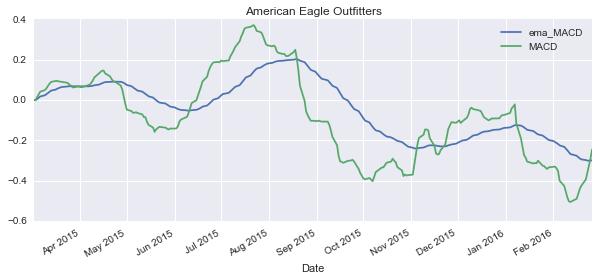

In [31]:
AEO[['ema_MACD','MACD']].plot(subplots=False,figsize=(10,4),
                              title = 'American Eagle Outfitters')

We see for AEO that the ema_MACD line (blue) crosses over the MACD (green) in a downward direction in September 2015. This would be a signal to sell shares of this company. This coincides with the MA plot for AEO where we observed that the 15 day MA trend crossed over the 50 day MA trend in a downward direction signalling the beginning of a down_trend. So overall, we are more confident that in September 2015, the shares for AEO began a downward price tendency and we should sell them.

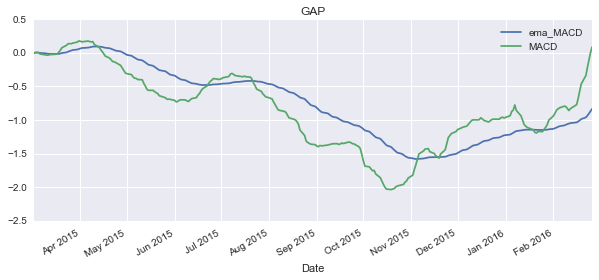

In [32]:
GPS[['ema_MACD','MACD']].plot(subplots=False,figsize=(10,4),
                              title = 'GAP')

In the case of GAP, the ema_MACD line (blue) crosses the MACD line (green) in an upward direction in May 2015, then down in July, up again in August and Nov. These do not coincide with the cross of the 15 day MA over the 50 day MA. I am less confident about selling or buying shares from nly inspecting this graph. More analysis is probably required.

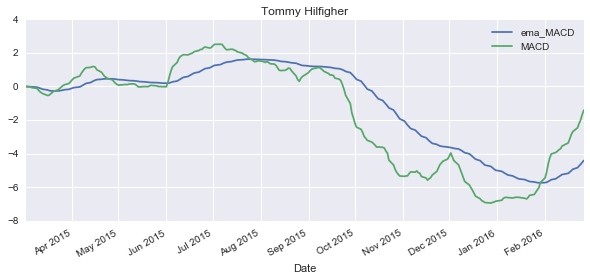

In [33]:
PVH[['ema_MACD','MACD']].plot(subplots=False,figsize=(10,4),
                              title = 'Tommy Hilfigher')

For PVHgroup we see a clear uptrend (cross of ema_MCDA over MCDA) in February 2016, which coincides with the cross of the 15 day MA over the 50 day MA in the previous plot. This could be a clear signal to buy shares for this group.

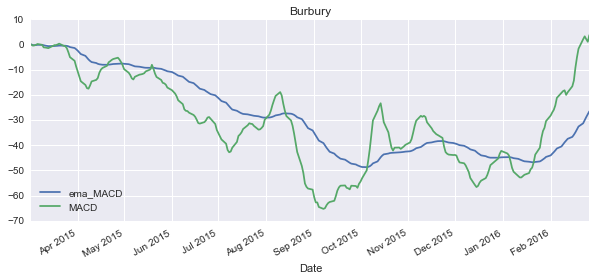

In [34]:
BRBY[['ema_MACD','MACD']].plot(subplots=False,figsize=(10,4),
                              title = 'Burbury')

The same observation that for PVH group.

## Daily Return

The daily return of a stock is the difference between the Closing Price of one day and the following. It indicates whether money has been lost or gained for that share in a given day.

In [35]:
# calculate the daily return )in percentage change
AEO['DailyReturn'] = AEO['Adj Close'].pct_change()
GPS['DailyReturn'] = GPS['Adj Close'].pct_change()
PVH['DailyReturn'] = PVH['Adj Close'].pct_change()
BRBY['DailyReturn'] = BRBY['Adj Close'].pct_change()

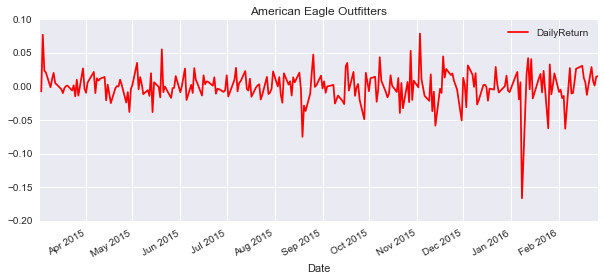

In [36]:
AEO['DailyReturn'].plot(figsize=(10,4),legend=True,color = 'red', title = 'American Eagle Outfitters')

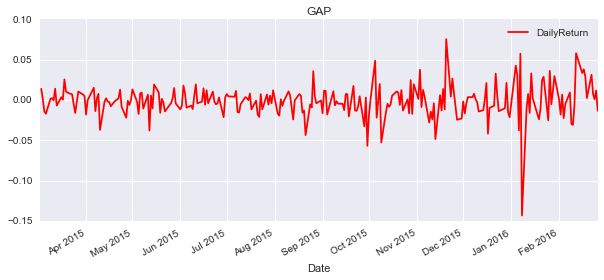

In [37]:
GPS['DailyReturn'].plot(figsize=(10,4),legend=True,color = 'red', title = 'GAP')

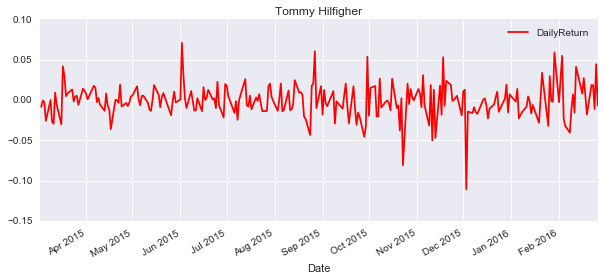

In [38]:
PVH['DailyReturn'].plot(figsize=(10,4),legend=True,color = 'red', title = 'Tommy Hilfigher')

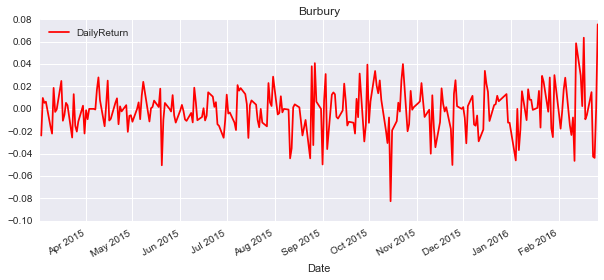

In [39]:
BRBY['DailyReturn'].plot(figsize=(10,4),legend=True,color = 'red', title = 'Burbury')

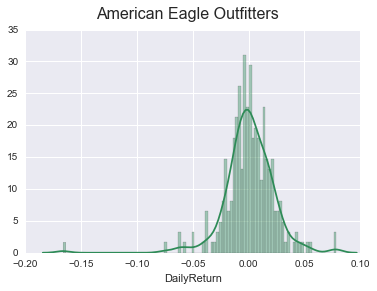

In [40]:
fig = plt.figure()
sns.distplot(AEO['DailyReturn'].dropna(), bins = 100, color = 'seagreen')
fig.suptitle('American Eagle Outfitters', fontsize = 16)

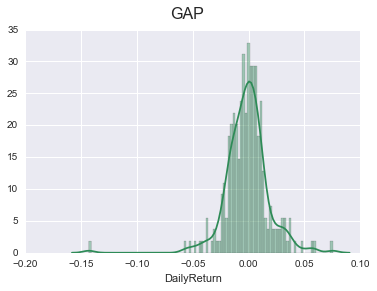

In [41]:
fig = plt.figure()
sns.distplot(GPS['DailyReturn'].dropna(), bins = 100, color = 'seagreen')
fig.suptitle('GAP', fontsize = 16)

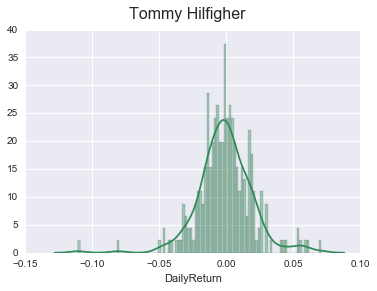

In [42]:
fig = plt.figure()
sns.distplot(PVH['DailyReturn'].dropna(), bins = 100, color = 'seagreen')
fig.suptitle('Tommy Hilfigher', fontsize = 16)

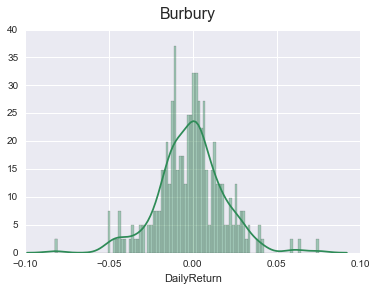

In [43]:
fig = plt.figure()
sns.distplot(BRBY['DailyReturn'].dropna(), bins = 100, color = 'seagreen')
fig.suptitle('Burbury', fontsize = 16)

## Value at Risk

Value at risk is the potential amount of money that we could loose within a certain confidence interval.

In [44]:
# value at risk 
AEO['DailyReturn'].quantile(0.05)

-0.031769294642306434

In [45]:
GPS['DailyReturn'].quantile(0.05)

-0.026855668675611809

In [46]:
PVH['DailyReturn'].quantile(0.05)

-0.031454533417132897

In [47]:
BRBY['DailyReturn'].quantile(0.05)

-0.035341053739901096

We observe that the value at risk for the stocks of these companies varies between 2.6 and 3.6 % of the invested money.

Another way to calculate risk is utilising the standard deviation of the daily returns.

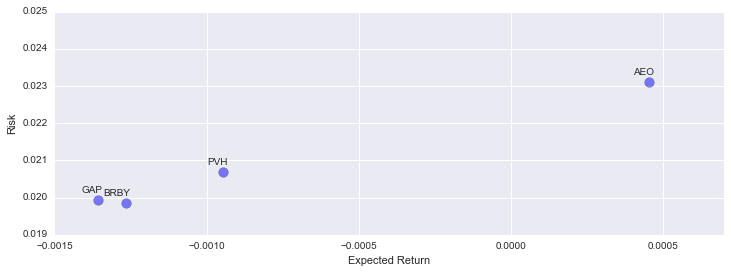

In [48]:
# make dataframe with daily returns
daily_rets = pd.concat([AEO['DailyReturn'], GPS['DailyReturn'],PVH['DailyReturn'],BRBY['DailyReturn']],
                       axis = 1)

daily_rets.columns = ['AEO', 'GAP', 'PVH', 'BRBY']

fig = plt.figure(figsize = (12,4))
plt.scatter(daily_rets.mean(), daily_rets.std(), alpha = 0.5, s = np.pi*30)

plt.xlim([-0.0015, 0.0007])
plt.ylim([0.019, 0.025])

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(daily_rets.columns, daily_rets.mean(), daily_rets.std()):
    plt.annotate(label,
                 xy = (x,y), xytext = (5,5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom')

From the plot we observe that 3 of the companies have a negative average daily return, which indicates that most likely we would be loosing money if we have those shares. The only one with a positive mean daily return is American Urban Outfitters, but the mean daily return is lower than the value at risk. So overall, given that these stocks have a negative trend, the daily return is almost null, and the risk is higher than the return, perhaps the best is to look somewhere else for investing.

## Monte Carlo simulation for Value at Risk

Using the geometric Brownian motion:

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

In [49]:
# function for Monte Carlo simulations

def stock_monte_carlo(start_price, mu, sigma, days):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    dt = 1/days
    
    for day in range(1,days):
        drift[day] = mu * day
        shock[day] = np.random.normal(loc = drift[day], scale = sigma * np.sqrt(day))
        
        price[day] = price[day-1] + price[day-1] * (drift[day] + shock[day])
        
    return price

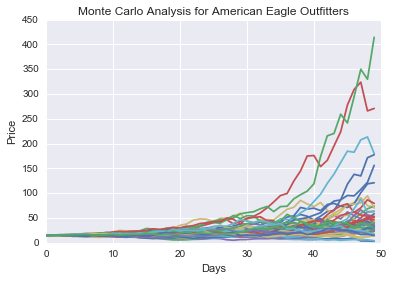

In [50]:
# Monte Carlo for American Eagle Outfitters

days = 50
mu = AEO['DailyReturn'].mean()
sigma = AEO['DailyReturn'].std()
start_price = 15

for run in range(50):
    plt.plot(stock_monte_carlo(start_price, mu, sigma, days))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for American Eagle Outfitters')

In [51]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,mu,sigma, days)[days-1]

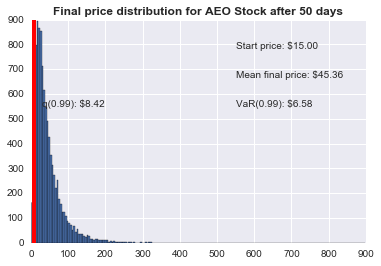

In [52]:
# q as the 5% empirical qunatile
q = np.percentile(simulations, 5)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for AEO Stock after %s days" % days, weight='bold');

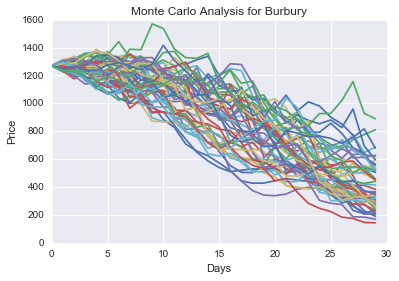

In [53]:
# Monte Carlo for Burbury

days = 30
mu = BRBY['DailyReturn'].mean()
sigma = BRBY['DailyReturn'].std()
start_price = 1269

for run in range(50):
    plt.plot(stock_monte_carlo(start_price, mu, sigma, days))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Burbury')

In [54]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,mu,sigma, days)[days-1]

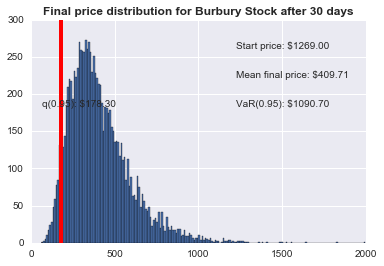

In [55]:
# q as the 5% empirical qunatile
q = np.percentile(simulations, 5)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.95): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.95): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Burbury Stock after %s days" % days, weight='bold');

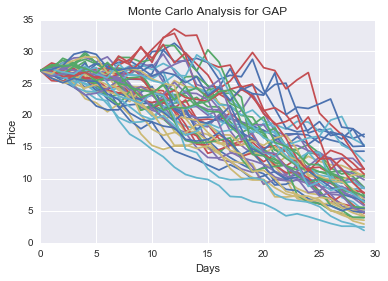

In [56]:
# Monte Carlo for GAP

days = 30
mu = GPS['DailyReturn'].mean()
sigma = GPS['DailyReturn'].std()
start_price = 27

for run in range(50):
    plt.plot(stock_monte_carlo(start_price, mu, sigma, days))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for GAP')